In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../data/flights.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


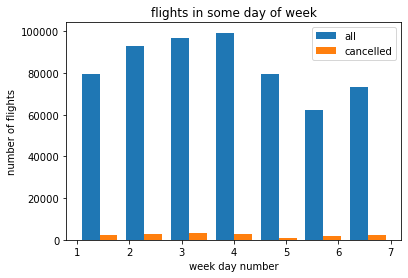

In [50]:
boolean_cancelled = df['CANCELLED']==1.0
days_cancelled = df.DAY_OF_WEEK[boolean_cancelled]
labels = ['all', 'cancelled']
plot = plt.figure()
ax = plot.add_subplot(111, xlabel='week day number', ylabel='number of flights')
plot = plt.hist([df["DAY_OF_WEEK"], days_cancelled], label=labels, bins=7)
fig = plt.legend()
fig = plt.title("flights in some day of week")

In [51]:
pd.DataFrame({'unicos':df.nunique(),
              'missing': df.isna().sum()/df.count(),
              'tipo':df.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.000000,int64
DAY_OF_WEEK,7,0.000000,int64
OP_UNIQUE_CARRIER,17,0.000000,object
OP_CARRIER_AIRLINE_ID,17,0.000000,int64
OP_CARRIER,17,0.000000,object
TAIL_NUM,5446,0.004374,object
OP_CARRIER_FL_NUM,6839,0.000000,int64
ORIGIN_AIRPORT_ID,346,0.000000,int64
ORIGIN_AIRPORT_SEQ_ID,346,0.000000,int64
ORIGIN,346,0.000000,object


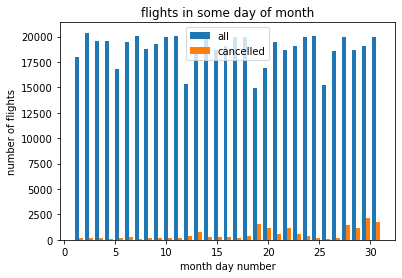

In [52]:
boolean_cancelled = df['CANCELLED']==1.0
month_cancelled = df.DAY_OF_MONTH[boolean_cancelled]
labels = ['all', 'cancelled']
plot = plt.figure()
ax = plot.add_subplot(111, xlabel='month day number', ylabel='number of flights')
plot = plt.hist([df["DAY_OF_MONTH"], month_cancelled], label=labels, bins=31)
fig = plt.legend()
fig = plt.title("flights in some day of month")

In [53]:
df.dropna(axis=1, inplace=True)

In [54]:
pd.DataFrame({'unicos':df.nunique(),
              'missing': df.isna().mean()*100,
              'tipo':df.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.0,int64
DAY_OF_WEEK,7,0.0,int64
OP_UNIQUE_CARRIER,17,0.0,object
OP_CARRIER_AIRLINE_ID,17,0.0,int64
OP_CARRIER,17,0.0,object
OP_CARRIER_FL_NUM,6839,0.0,int64
ORIGIN_AIRPORT_ID,346,0.0,int64
ORIGIN_AIRPORT_SEQ_ID,346,0.0,int64
ORIGIN,346,0.0,object
DEST_AIRPORT_ID,346,0.0,int64


In [55]:
df = df.drop(['ORIGIN', 'DEST', 'DEP_TIME_BLK', 'OP_CARRIER', 'OP_UNIQUE_CARRIER'], axis=1)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,3280,11953,1195302,10397,1039707,0.0,0.0,300.0
1,1,2,20363,3281,13487,1348702,11193,1119302,0.0,0.0,596.0
2,1,2,20363,3282,11433,1143302,11193,1119302,0.0,0.0,229.0
3,1,2,20363,3283,15249,1524906,10397,1039707,0.0,0.0,223.0
4,1,2,20363,3284,10397,1039707,11778,1177801,0.0,0.0,579.0


In [56]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return

y = df['CANCELLED']
df.drop('CANCELLED', axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)
model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_pred)
#plt.plot(X, model.predict(Y), color='green')
#plt.show()
accuracy, y_pred

(1.0,
 array([0.01744224, 0.00049222, 0.02048794, ..., 0.0574547 , 0.00584882,
        0.02017034]))